In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime

### Question 1

We want to look at the average order value (AOV) for each shop (100 total shops, each shop only sells one type of shoe)

When looking at a 30 day window, the erroneous calculation for AOV was $3145.13. 


**Assumptions**:

- Assuming that 'order_amount' means to the total order amount paid for the total number of items in 'total_items' column (for each row)

- Each shop sells one model/type of shoe, but I'm assuming that these shoe types/models can be different between stores

In [82]:
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data['created_at'] = pd.to_datetime(data['created_at'], format='%Y-%m-%d %H:%M:%S')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [83]:
# all from march 2017
# data['created_at'].apply(lambda x: x.day).unique()

**Erroneous Calculation + Explanation**

In [84]:
# First, the erroneous calculation: 

np.mean(data['order_amount'])

# this isn't correct since we're simply averaging all of the prices without taking into consideration 
# the amount of items sold (i.e. using np.mean to do a simple average assumes that each price in the 
# calculation corresponds to 1 shoe sold at that X price)

# simply averaging like this also doesn't take into consideration duplicates from shops
# i.e. if a shop sells its shoe for 100 each, and there are two customers 
# customer A buys $300 worth of shoes and customer B busy $500 worth of shoes, 
# then averaging like we did before would get us (500 + 300) / 2 = 400 per shoe (when in reality its $100/shoe)

# we need to find the price per shoe before averaging across all shops

3145.128

**Proposed way to calculate AOV**

In [85]:
data['price_per_shoe'] = data['order_amount'] / data['total_items']
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_shoe
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0


In [128]:
# data[['shop_id', 'price_per_shoe']].groupby('shop_id').mean()

In [88]:
t = data.groupby('shop_id').agg({'order_amount': 'sum', 
                            'total_items': 'sum'})

t.rename(columns={'order_amount': 'total_order_amount'},inplace=True)

t['price_per_item'] = t['total_order_amount'] / t['total_items']

t

,total_order_amount,total_items,price_per_item
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0
...,...,...,...
96,16830,110,153.0
97,15552,96,162.0
98,14231,107,133.0


In [89]:
# CALCULATION: 

#average and median price per shoe (across all 100 stores)
#median is probably a better statistic cuz of outliers

avg_price_per_shoe = np.mean(data[['shop_id', 'price_per_shoe']].groupby('shop_id').mean()['price_per_shoe'])
median_price_per_shoe = np.median(data[['shop_id', 'price_per_shoe']].groupby('shop_id').mean()['price_per_shoe'])

print('avg: ', avg_price_per_shoe, 'median: ', median_price_per_shoe)

avg:  407.99 median:  153.0


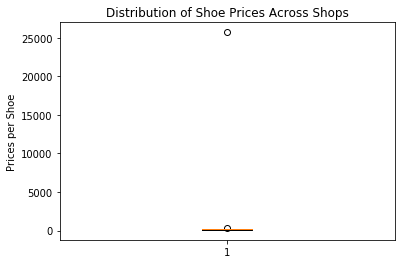

In [122]:
#visualize distrubtion in boxplot

plt.boxplot(data[['shop_id', 'price_per_shoe']].groupby('shop_id').mean()['price_per_shoe'])
plt.title("Distribution of Shoe Prices Across Shops")
plt.ylabel('Prices per Shoe');

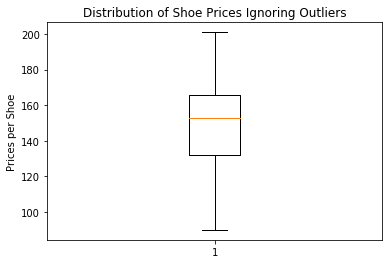

In [123]:
# if we ignore the main outliers, we generally see that the range is between ~100 to 200)

price_per_shoe = data[['shop_id', 'price_per_shoe']].groupby('shop_id').mean()['price_per_shoe']
no_outliers = price_per_shoe[price_per_shoe < 300]
plt.boxplot(no_outliers)
plt.title('Distribution of Shoe Prices Ignoring Outliers')
plt.ylabel('Prices per Shoe');

In [130]:
#No outliers mean and median 
print('avg: ', np.mean(no_outliers), "median: ", np.median(no_outliers))

avg:  150.22448979591837 median:  153.0


**Outlier Investigation**

In [93]:
t[t['price_per_item'] > 250]

,total_order_amount,total_items,price_per_item
shop_id,,,
42,11990176,34063,352.0
78,2263800,88,25725.0


In [127]:
# price shoes were bought by various people and on different days

data[data['shop_id'] == 42].head()#['created_at'].apply(lambda x: x.day).unique()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_shoe
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0
